<a href="https://colab.research.google.com/github/yenirsmwati/binar-academy-fga/blob/main/Prediction_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
filenya = files.upload()

Saving Data Train.csv to Data Train.csv


In [ ]:
import io
df_train = pd.read_csv(io.StringIO(filenya['Data Train.csv'].decode('utf-8')))

#Data Reading

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_train.shape

(4250, 20)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

#EDA

In [ ]:
df_stats = df_train.describe().T
df_stats['Variance'] = df_stats['std']**2
df_stats['Range'] = df_stats['max']-df_stats['min']
df_stats

,count,mean,std,min,25%,50%,75%,max,Variance,Range
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00,1575.963008,242.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00,180.630433,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50,2917.336473,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00,394.054948,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76,84.310888,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30,2525.014078,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00,396.352000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54,18.243252,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00,2535.479804,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00,403.737482,175.00


In [ ]:
from pandas.core.dtypes.dtypes import dtypes
def summary_tab(df):
    summary = pd.DataFrame({
         'kolom' :  df.columns,
         'dataTypes' : df.dtypes,
         'null' : df.isna().sum(),
         'null_percentage' : round(df.isna().sum() / len(df) * 100, 2),
         'unique' : df.nunique(),
         'unique_sample' : [list(df[i].drop_duplicates().sample(2)) for i in df.columns]
    })
    summary['unique_%'] = round(summary['unique'] / len(df) * 100, 2)
    return summary.reset_index(drop=True)


In [ ]:
summary_tab(df_train)

,kolom,dataTypes,null,null_percentage,unique,unique_sample,unique_%
0,state,object,0,0.0,51,"[WI, NJ]",1.20
1,account_length,int64,0,0.0,215,"[141, 243]",5.06
2,area_code,object,0,0.0,3,"[area_code_408, area_code_415]",0.07
3,international_plan,object,0,0.0,2,"[no, yes]",0.05
4,voice_mail_plan,object,0,0.0,2,"[yes, no]",0.05
5,number_vmail_messages,int64,0,0.0,46,"[34, 20]",1.08
6,total_day_minutes,float64,0,0.0,1843,"[153.8, 89.7]",43.36
7,total_day_calls,int64,0,0.0,120,"[73, 67]",2.82
8,total_day_charge,float64,0,0.0,1843,"[33.66, 32.2]",43.36
9,total_eve_minutes,float64,0,0.0,1773,"[261.6, 200.1]",41.72


#Data Cleaning

memisahkan data numerik dan kategori

In [ ]:
numerical = df_train.select_dtypes(include="number")
categorical = df_train.select_dtypes(include="object")
display(numerical.head(), categorical.head())

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


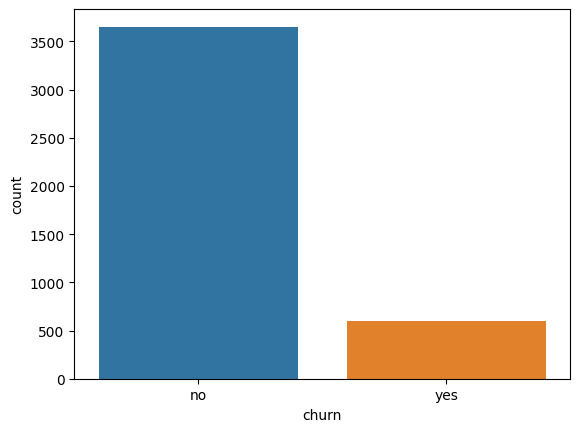

In [ ]:
sns.countplot(x='churn',data=df_train);

**1. Mencari Missing Value**

In [ ]:
df_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

**2. Mencari outlier**

In [ ]:
def get_len_outliers(df):
    p75 = df.quantile(0.75)
    p25 = df.quantile(0.25)

    iqr = p75-p25

    min_val = p25 - 1.5*iqr
    max_val = p75 + 1.5*iqr

    outliers = df[(df < min_val) | (df > max_val)]
    return len(outliers)


In [ ]:
descript = df_train.describe(include='number').T
descript['num_outlier'] = numerical.apply(get_len_outliers).values

In [ ]:
descript

,count,mean,std,min,25%,50%,75%,max,num_outlier
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00,20
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00,86
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50,25
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00,28
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76,26
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30,34
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00,24
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54,34
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00,37
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00,33


In [ ]:
Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]

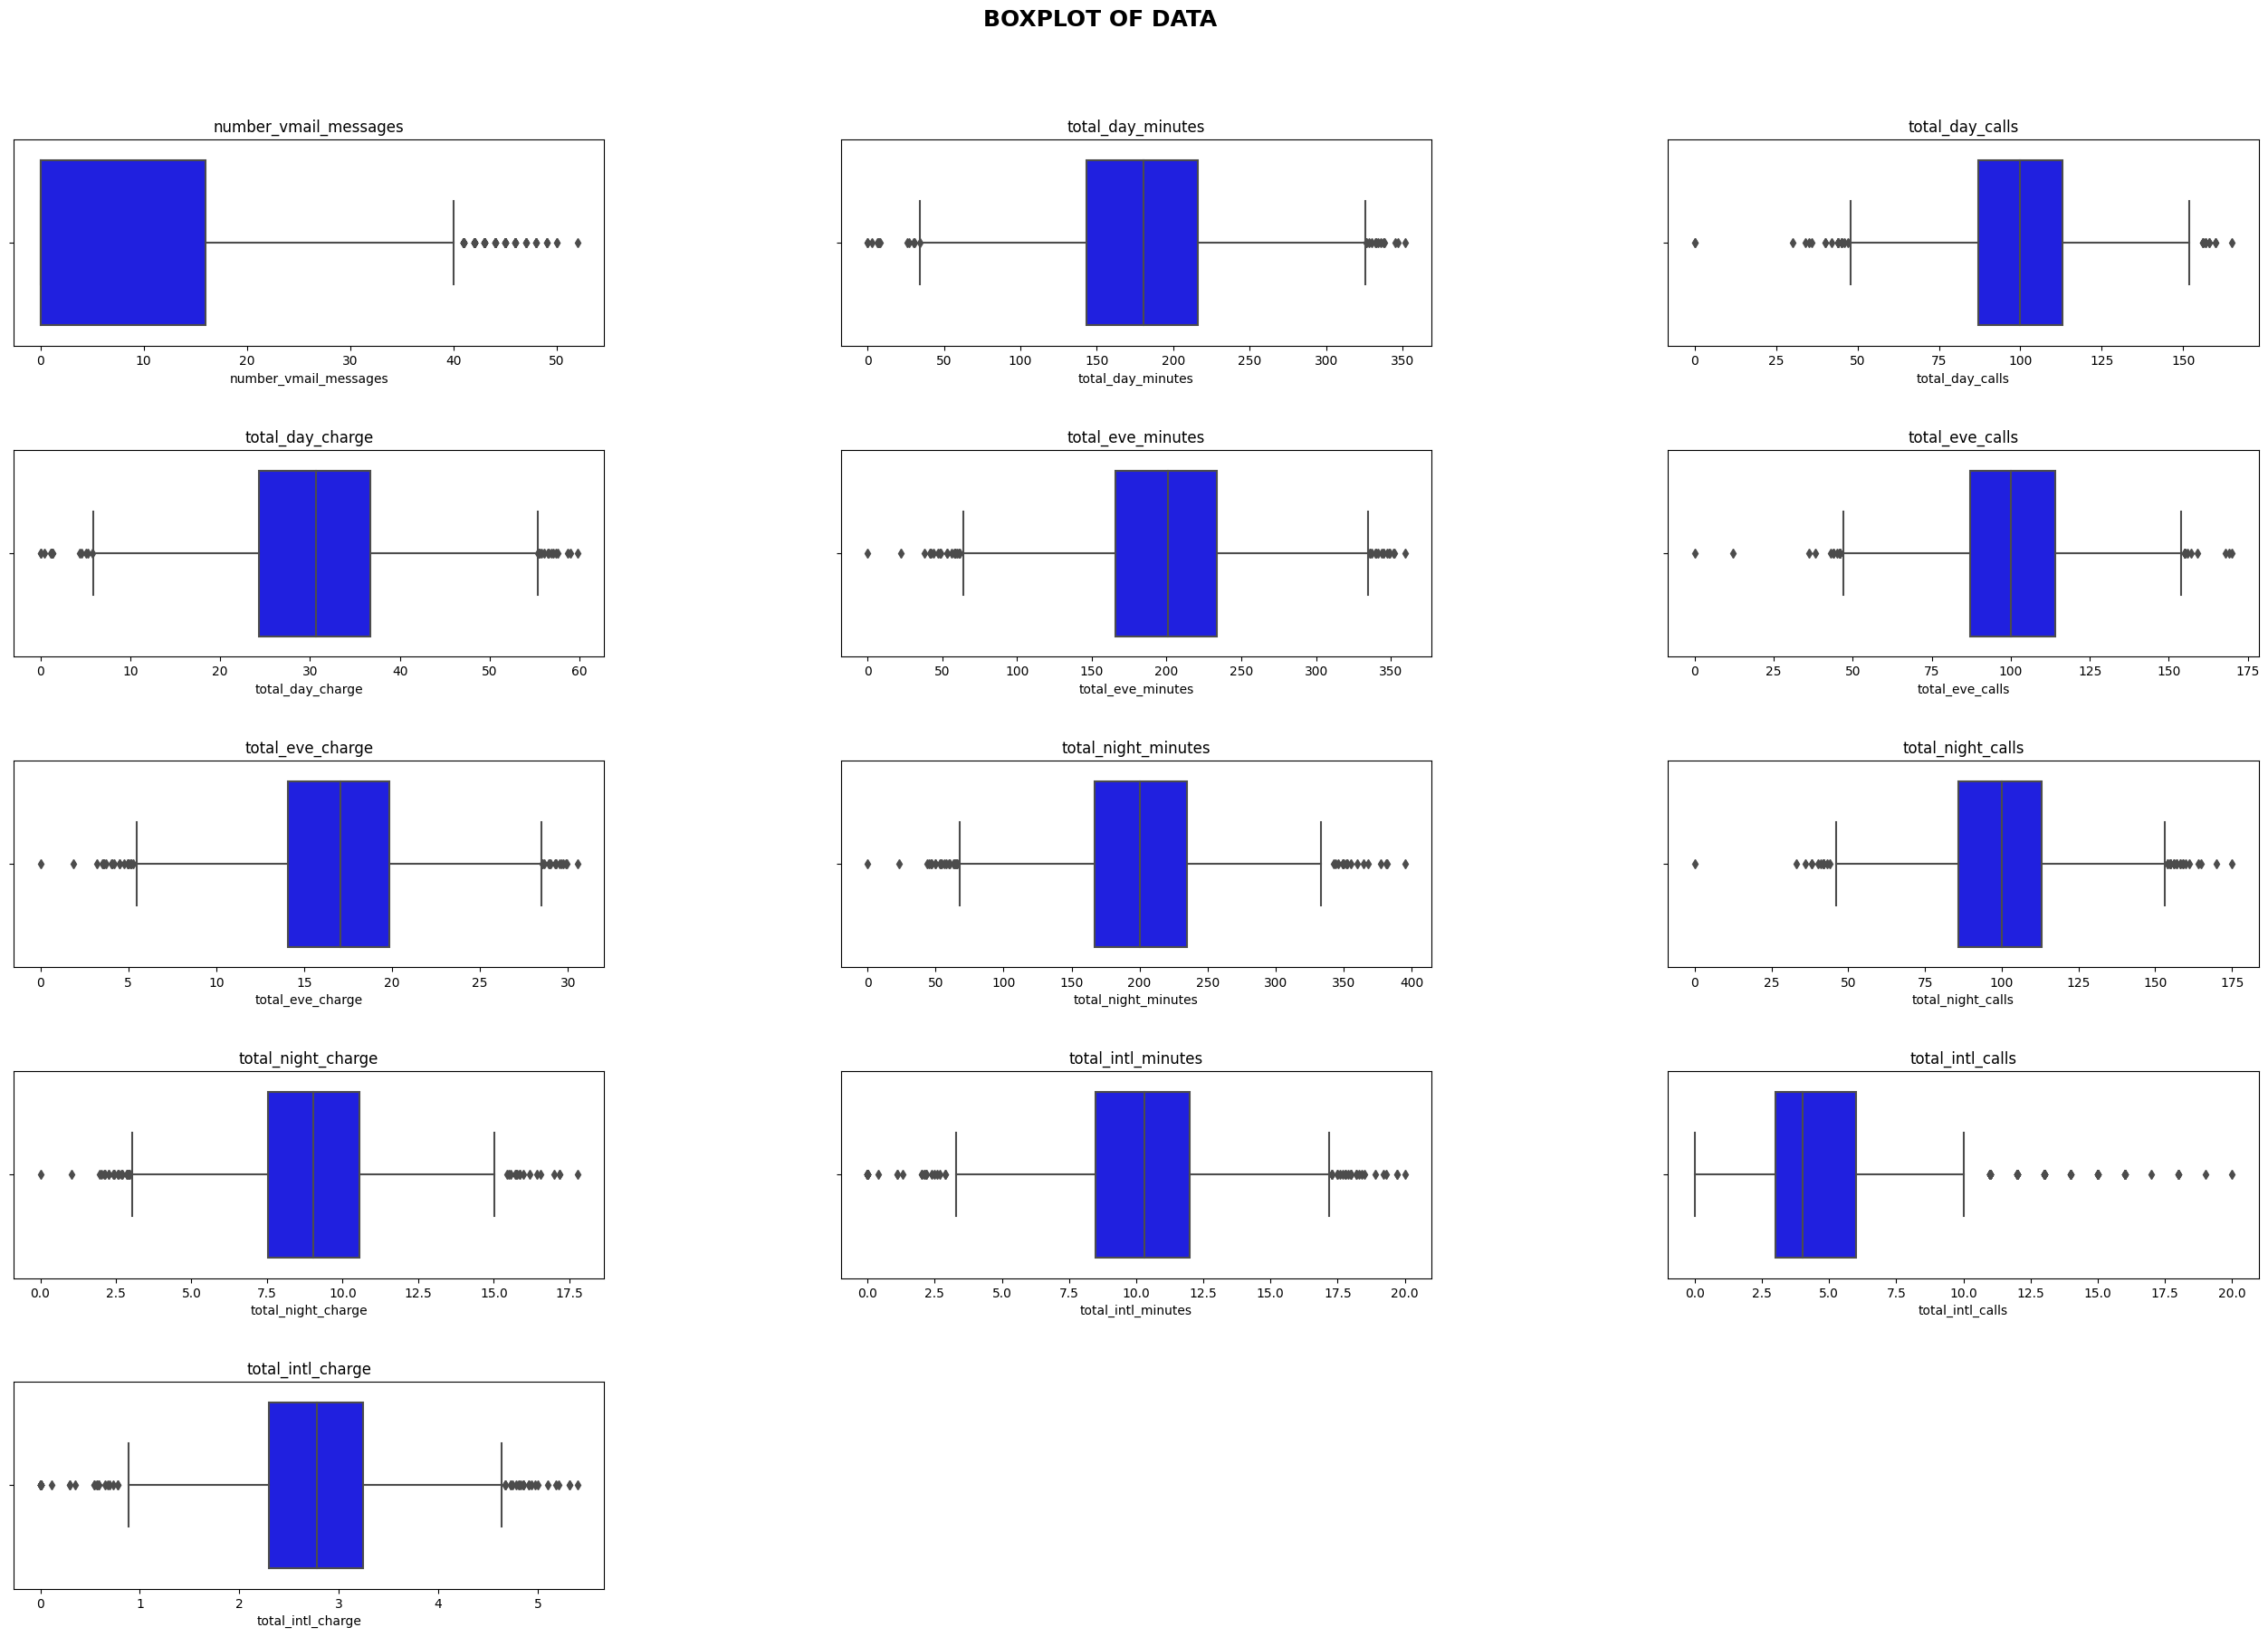

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df_train, x=col, color='blue' );

    ax1.set_title(f'{col}')
    ax1.set_xlabel(f'{col}')

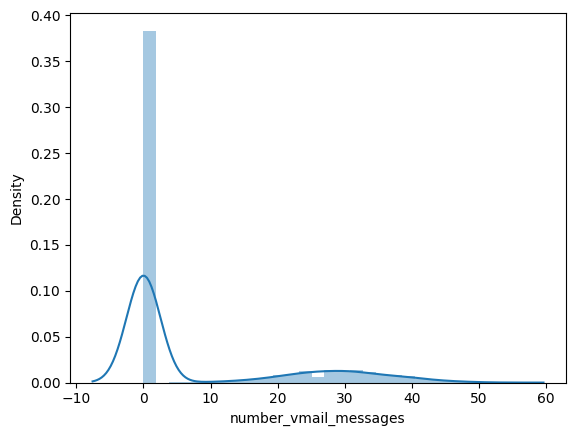

In [ ]:
sns.distplot(df_train['number_vmail_messages']);

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df_train['total_day_minutes'])

if p > 0.05:
    print(" Normal Distribusi")
else:
    print("Tidak Normal Distribusi")

 Normal Distribusi


**3. Duplicate data**

In [ ]:
df_train.duplicated().sum()

0

**4. mengubah data kategori**

In [ ]:
categorical.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [ ]:
df_train['international_plan'] = df_train['international_plan'].map({'yes':1,'no':0})

In [ ]:
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].map({'yes':1,'no':0})

In [ ]:
df_train['churn'] = df_train['churn'].map({'yes':1,'no':0})

In [ ]:
df_train['state'] = df_train['state'].astype('category').cat.codes
df_train['area_code'] = df_train['area_code'].astype('category').cat.codes


In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
df_train['total_minutes'] = df_train['total_day_minutes'] + df_train['total_eve_minutes'] + df_train['total_night_minutes']
df_train['total_calls'] = df_train['total_day_calls'] + df_train['total_eve_calls'] + df_train['total_night_calls']
df_train['total_charge'] = df_train['total_day_charge'] + df_train['total_eve_charge'] + df_train['total_night_charge']

In [ ]:
df_train.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes',
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,35,107,1,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,31,137,1,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,35,84,0,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,36,75,1,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,19,121,2,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28


In [ ]:
df_train.shape

(4250, 14)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int8   
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int8   
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_intl_minutes             4250 non-null   float64
 7   total_intl_calls               4250 non-null   int64  
 8   total_intl_charge              4250 non-null   float64
 9   number_customer_service_calls  4250 non-null   int64  
 10  churn                          4250 non-null   int64  
 11  total_minutes                  4250 non-null   float64
 12  total_calls                    4250 non-null   i

#Machine Learning

In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

**1. Split variabel target dan data train**

In [ ]:
Y = df_train['churn']
X = df_train.drop(['churn'], axis = 1)

In [ ]:
Y.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [ ]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
Y_test.shape

(1275,)

__2. Membuat Model__

**2.1 Model Decision Tree**

In [ ]:
model_dcs = DecisionTreeClassifier()
model_dcs.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dcs = model_dcs.predict(X_test)

In [ ]:
model_dcs.score(X_test, Y_test)

0.956078431372549

In [ ]:
CM=confusion_matrix(Y_test, y_pred_dcs)

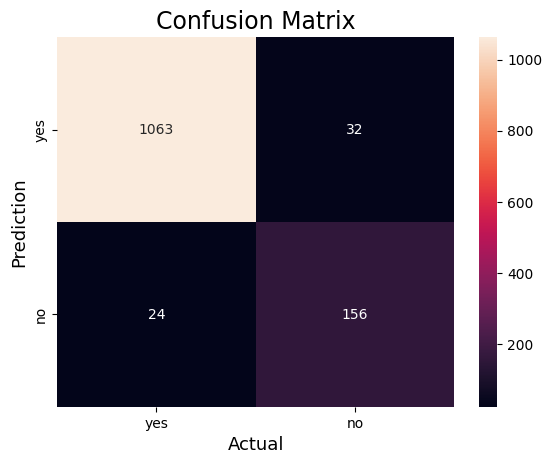

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(CM,
            annot=True,
            fmt='g',
            xticklabels=['yes','no'],
            yticklabels=['yes','no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
accuracy = accuracy_score(Y_test, y_pred_dcs)
print("Accuracy   :", accuracy)
precision = precision_score(Y_test, y_pred_dcs)
print("Precision :", precision)
recall = recall_score(Y_test, y_pred_dcs)
print("Recall    :", recall)
F1_score = f1_score(Y_test, y_pred_dcs)
print("F1-score  :", F1_score)
AUC = roc_auc_score(Y_test, y_pred_dcs)
print("ROC AUC  :", AUC)

Accuracy   : 0.956078431372549
Precision : 0.8297872340425532
Recall    : 0.8666666666666667
F1-score  : 0.8478260869565217
ROC AUC  : 0.9187214611872146


**2.2 Model KNN**

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = model_knn.predict(X_test)

In [ ]:
model_knn.score(X_test, Y_test)

0.8635294117647059

In [ ]:
CM_knn=confusion_matrix(Y_test, y_pred_knn)
CM_knn

array([[1057,   38],
       [ 136,   44]])

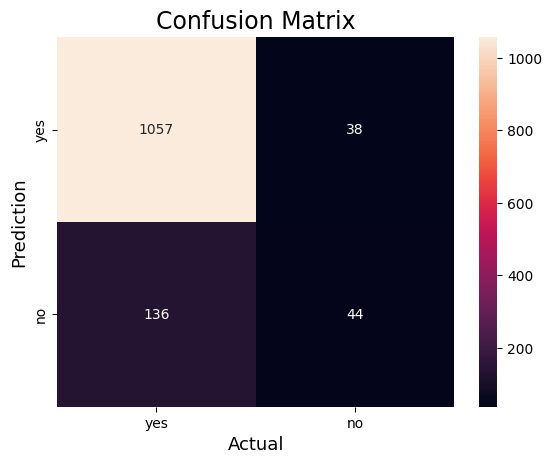

In [ ]:
sns.heatmap(CM_knn,
            annot=True,
            fmt='g',
            xticklabels=['yes','no'],
            yticklabels=['yes','no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
accuracy = accuracy_score(Y_test, y_pred_knn)
print("Accuracy   :", accuracy)
precision = precision_score(Y_test, y_pred_knn)
print("Precision :", precision)
recall = recall_score(Y_test, y_pred_knn)
print("Recall    :", recall)
F1_score = f1_score(Y_test, y_pred_knn)
print("F1-score  :", F1_score)
AUC = roc_auc_score(Y_test, y_pred_knn)
print("ROC AUC  :", AUC)

Accuracy   : 0.8635294117647059
Precision : 0.5365853658536586
Recall    : 0.24444444444444444
F1-score  : 0.33587786259541985
ROC AUC  : 0.6048706240487062


#Prediksi Customer churn

In [ ]:
from google.colab import files
filenya = files.upload()

Saving Data Test.csv to Data Test.csv


In [ ]:
import io
df_test = pd.read_csv(io.StringIO(filenya['Data Test.csv'].decode('utf-8')))

In [ ]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
len(df_test)

750

In [ ]:
df_test['international_plan'] = df_test['international_plan'].map({'yes':1,'no':0})

In [ ]:
df_test['voice_mail_plan'] = df_test['voice_mail_plan'].map({'yes':1,'no':0})

In [ ]:
df_test['state'] = df_test['state'].astype('category').cat.codes
df_test['area_code'] = df_test['area_code'].astype('category').cat.codes
df_test['voice_mail_plan'] = df_test['voice_mail_plan'].astype('category').cat.codes

In [ ]:
df_test['total_minutes'] = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes']
df_test['total_calls'] = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls']
df_test['total_charge'] = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge']

In [ ]:
df_test.drop(columns=['id','total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes',
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          750 non-null    int8   
 1   account_length                 750 non-null    int64  
 2   area_code                      750 non-null    int8   
 3   international_plan             750 non-null    int64  
 4   voice_mail_plan                750 non-null    int8   
 5   number_vmail_messages          750 non-null    int64  
 6   total_intl_minutes             750 non-null    float64
 7   total_intl_calls               750 non-null    int64  
 8   total_intl_charge              750 non-null    float64
 9   number_customer_service_calls  750 non-null    int64  
 10  total_minutes                  750 non-null    float64
 11  total_calls                    750 non-null    int64  
 12  total_charge                   750 non-null    flo

In [ ]:
df_x = df_test[X.columns]


menggunakan model decision tree yang sebelumnya sudah di training

In [ ]:
y_pred = model_dcs.predict(df_x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
class_test = pd.DataFrame(y_pred)
class_test.columns = ['churn']
class_test

,churn
0,0
1,0
2,0
3,0
4,0
...,...
745,0
746,0
747,0
748,0


In [ ]:
df_gabung = pd.concat([df_x,class_test], axis =1)
df_gabung

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge,churn
0,16,128,1,0,1,25,10.0,3,2.70,1,707.2,300,72.86,0
1,1,118,2,1,0,0,6.3,6,1.70,0,647.9,317,65.91,0
2,12,62,1,0,0,0,13.1,6,3.54,4,630.9,245,55.77,0
3,46,93,2,0,0,0,8.1,3,2.19,3,538.5,346,56.80,0
4,29,174,1,0,0,0,15.5,5,4.19,3,652.1,303,55.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,10,130,1,0,0,0,11.3,7,3.05,0,548.4,307,48.66,0
746,47,73,0,0,0,0,12.3,2,3.32,3,689.5,314,63.99,0
747,49,152,1,0,0,0,14.7,2,3.97,3,654.6,276,62.75,0
748,7,61,1,0,0,0,13.6,4,3.67,1,525.8,314,48.15,0


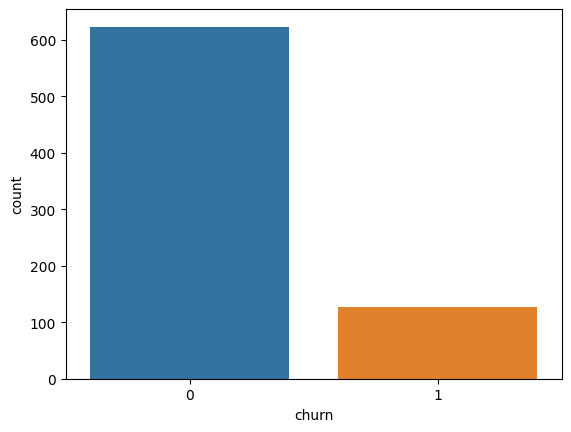

In [ ]:
sns.countplot(x='churn',data=df_gabung);

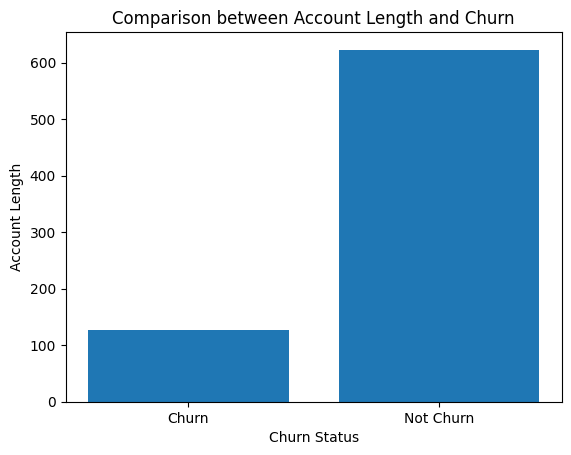

In [ ]:

# Membuat sub-dataframe dengan hanya mengambil kolom yang diperlukan
sub_df = df_gabung[['account_length', 'churn']]

# Menghitung jumlah pelanggan yang churn dan tidak churn
churn_count = sub_df[sub_df['churn']==1]['account_length'].count()
not_churn_count = sub_df[sub_df['churn']==0]['account_length'].count()

# Membuat grafik
plt.bar(['Churn', 'Not Churn'], [churn_count, not_churn_count])
plt.title('Comparison between Account Length and Churn')
plt.xlabel('Churn Status')
plt.ylabel('Account Length')
plt.show()
